# Graph Analysis
### Breadth-first search
**Breadth-first search** (**BFS**) is like **depth-first search**, an **uninformed** search algorthim. But instead of *recursion* or using *stack*, **BFS** uses a **queue** to store and retrieve nodes. 
- BFS is a **graph traversal** algorithm that explores all nodes at the current depth level before moving on to nodes at the next depth level. 

In other words, we may say BFS with given **graph** and **start_node**:
1. Create an empty queue.
2. Create a visited set.
3. Enqueue **start_node** and mark as visited.
4. While queue is not empty:
    - Dequeue current node.
    - Process current node.
    - Enqueue all unvisited neighbors.
    - Mark neighbors as visited.

**Hint:** BFS uses a **queu**e (**FIFO**: First-In, First-Out) to manage the order of exploration.

<hr>

Some key points about BFS:
- **Time complexity:** For a graph $G=(V,E)$, we need to explore every node and every edge in the worst case. Thus, the time complexity is $O(|V|+|E|)$.
- **Space complexity:** The space complexity for graph $G=(V,E)$ is $O(|V|)$.
- **Completeness:** If the graph is finite, completeness is guaranteed for a BFS.
- **Optimality:** BFS finds the **optimal** solution for **unweighted** graphs (in terms of the number of edges). 
  - This is in contrast to the **depth-first search** (DFS) that is not guaranteed to find the optimal solution.

**Reminder:** **Completeness** in search algorithms refers to whether the algorithm is guaranteed to find a solution if one exists.

<hr>

In the following, we implement the standard BFS with queue (which is an iterative algorithm). Then, we use BFS for finding the shortest path between start and end (target) nodes. Next, we compute the degree of speration of two users in **social networks**. Finally, we use **NetworkX** to display the graph used in the degree of separation.
<hr>

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# import required modules
from collections import deque
# Import this to display graphs
import networkx as nx

In [2]:
# Define the BFS, 
def bfs(graph, start):
    '''graph: an adjacency list '''
    '''start: is the start node to search from'''
    visited = set()
    queue = deque([start])
    # when enqueue node, mark it as visited
    visited.add(start)
   
    # while queue is not empty
    while queue:
        current = queue.popleft()
        # Process the current node
        print(f"Visiting: {current}")
        
        # Add unvisited neighbors to queue
        # and mark them as visited
        for neighbor in graph[current]:
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)

In [3]:
# Example graph (adjacency list)
# The same graph used in DFS

#     A
#    / \
#   B   C
#  /   / \
# D --E --F

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'E', 'F'],
    'D': ['B','E'],
    'E': ['C','D'],
    'F': ['C']
}

start='A'
print(f"BFS traversal starting from {start}:")
bfs(graph, start)

BFS traversal starting from A:
Visiting: A
Visiting: B
Visiting: C
Visiting: D
Visiting: E
Visiting: F


<hr style="height:3px;background-color:lightgreen">

### Some applications of BFS
- Find the shortest path from `start` to `end`
- Compute the degree of separation between users in `social networks`

In [8]:
def shortest_path_bfs(graph, start, end):
    if start == end:
        return [start]
    
    visited = set([start])
    queue = deque([(start, [start])])  # (node, path)
    
    while queue:
        current, path = queue.popleft()
        
        for neighbor in graph[current]:
            if neighbor == end:
                return path + [neighbor]
            
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor]))
    
    return None  # No path exists

#Example
# Find a path from start to end
start,end='A','F'
path=shortest_path_bfs(graph,start,end)
print(f'Find the shortest path from {start} to {end}')
print(f'The path is: {path}')

Find the shortest path from A to F
The path is: ['A', 'C', 'F']


In [5]:
def degrees_of_separation(network, person1, person2):
    """Degrees of separation in social network"""
    """between person1 and person2"""
    if person1 == person2:
        return 0
    
    visited = set([person1])
    queue = deque([(person1, 0)])  # (person, distance)
    
    while queue:
        current_person, distance = queue.popleft()
        
        for friend in network.get(current_person, []):
            if friend == person2:
                return distance + 1
            
            if friend not in visited:
                visited.add(friend)
                queue.append((friend, distance + 1))
    
    return -1  # Not connected

# A small, intuitive social network
simple_social_network = {
    'Alice': ['Bob', 'Charlie'],
    'Bob': ['Alice', 'Diana', 'Eve'],
    'Charlie': ['Alice', 'Frank'],
    'Diana': ['Bob', 'Grace'],
    'Eve': ['Bob', 'Frank'],
    'Frank': ['Charlie', 'Eve', 'Grace'],
    'Grace': ['Diana', 'Frank'],
    'Henry': []  # Isolated person
}

#Example usage
p1,p2,p3='Alice','Grace','Frank'
deg_p1_p2=degrees_of_separation(simple_social_network,p1,p2)
print(f'The degree of speraration between {p1} and {p2} is: {deg_p1_p2}')

deg_p1_p3=degrees_of_separation(simple_social_network,p1,p3)
print(f'The degree of speraration between {p1} and {p3} is: {deg_p1_p3}')

The degree of speraration between Alice and Grace is: 3
The degree of speraration between Alice and Frank is: 2


<hr style="height:3px; background-color:lightblue">

We display the graph used in the example above by **NetworkX**.

In [6]:
# Extra, a function to convert your graph to Networkx style,
# introduced in an earlier post
def convert_to_networkx(your_graph, directed=False):
    """
    Convert your custom graph to NetworkX format.
    your_graph: dict in format {node: [neighbors]}
    """
    if directed:
        nx_graph = nx.DiGraph()
    else:
        nx_graph = nx.Graph()
    
    for u, neighbors in your_graph.items():
        for v in neighbors:
            if isinstance(v,tuple):
                nx_graph.add_edge(u, v[0],weight=v[1])
            else:
                nx_graph.add_edge(u, v)
    
    return nx_graph

The simple social network


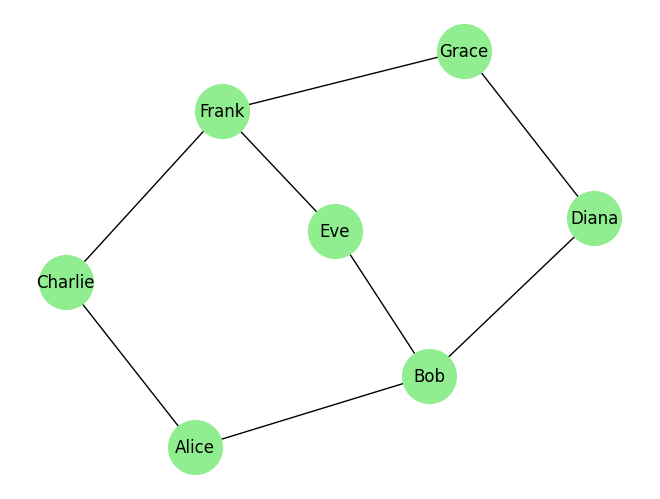

In [7]:
# convert graph into NetworkX style and display it
G_nx=convert_to_networkx(simple_social_network)
print('The simple social network')
nx.draw(G_nx,with_labels=True,node_color='lightgreen',node_size=1500)